# Plot Corrected Spectra

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import sdss_corrected_spectra

In [3]:
help(sdss_corrected_spectra)

Help on module astroML.datasets.sdss_corrected_spectra in astroML.datasets:

NAME
    astroML.datasets.sdss_corrected_spectra

FUNCTIONS
    compute_wavelengths(data)
        Compute the wavelength associated with spectra.
        
        Paramters
        ---------
        
        Parameters
        ----------
        data: NpzFile
            numpy data object returned by fetch_sdss_corrected_spectra.
        
        Returns
        -------
        wavelength: ndarray
            One-dimensional wavelength array for spectra.
    
    fetch_sdss_corrected_spectra(data_home=None, download_if_missing=True)
        Loader for Iterative PCA pre-processed galaxy spectra
        
        Parameters
        ----------
        data_home : optional, default=None
            Specify another download and cache folder for the datasets. By default
            all scikit learn data is stored in '~/astroML_data' subfolders.
        
        download_if_missing : optional, default=True
           

In [4]:
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()

downloading PCA-processed SDSS spectra from https://github.com/astroML/astroML-data/raw/master/datasets/spec4000.npz to /Users/jamesc/astroML_data
[=========================================]  27.15Mb / 27.15Mb   


In [10]:
spectra = sdss_corrected_spectra.reconstruct_spectra(data)

In [18]:
spectra.shape

(4000, 1000)

In [11]:
lam = sdss_corrected_spectra.compute_wavelengths(data)

In [19]:
lam.shape

(1000,)

In [16]:
spectra[:10]

array([[ 4.9201283,  5.1662374,  6.073041 , ...,  7.5093303,  7.970523 ,
         7.9843907],
       [ 2.189293 ,  2.1868663,  2.1844583, ..., 12.837092 , 12.934673 ,
        12.810533 ],
       [ 2.7451353,  2.738469 ,  3.368032 , ...,  9.2907915,  9.108875 ,
         8.385379 ],
       ...,
       [ 7.653368 ,  7.609222 ,  9.190352 , ..., 18.75766  , 17.380552 ,
        16.210718 ],
       [ 4.3692465,  4.9986715,  5.6906476, ..., 20.419928 , 20.581882 ,
        20.502544 ],
       [17.864431 , 17.21889  , 19.81184  , ..., 30.658922 , 30.369783 ,
        29.416834 ]], dtype=float32)

In [17]:
lam[:10]

array([3162.27766017, 3165.19156723, 3168.10815933, 3171.02743895,
       3173.94940856, 3176.87407065, 3179.80142769, 3182.73148217,
       3185.66423657, 3188.59969339])

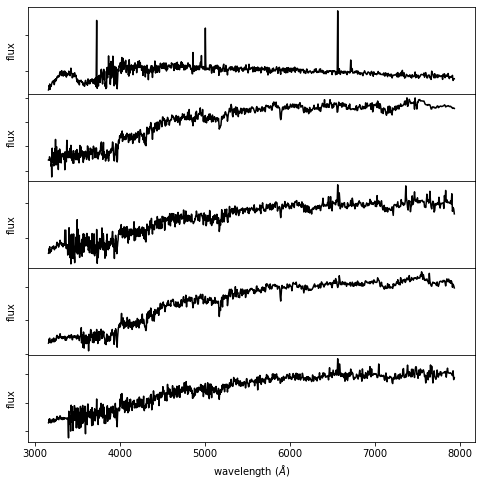

In [20]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0)

for i in range(5):
    ax = fig.add_subplot(511 + i)
    ax.plot(lam, spectra[i], '-k')

    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel(r'wavelength $(\AA)$')

    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylabel('flux')

plt.show()